In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns=['Unnamed: 32'],axis=1,inplace=True)

In [9]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [10]:

pd.set_option("display.max_rows", None)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='count', ylabel='diagnosis'>

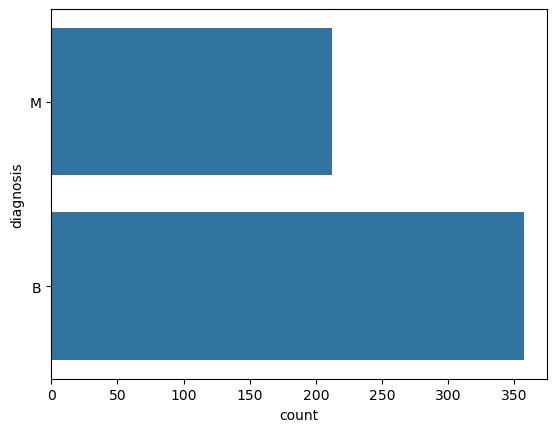

In [13]:
sns.countplot(df['diagnosis'])

In [14]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [15]:
df['diagnosis'].unique()

array([1, 0])

In [16]:
df.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

<Axes: >

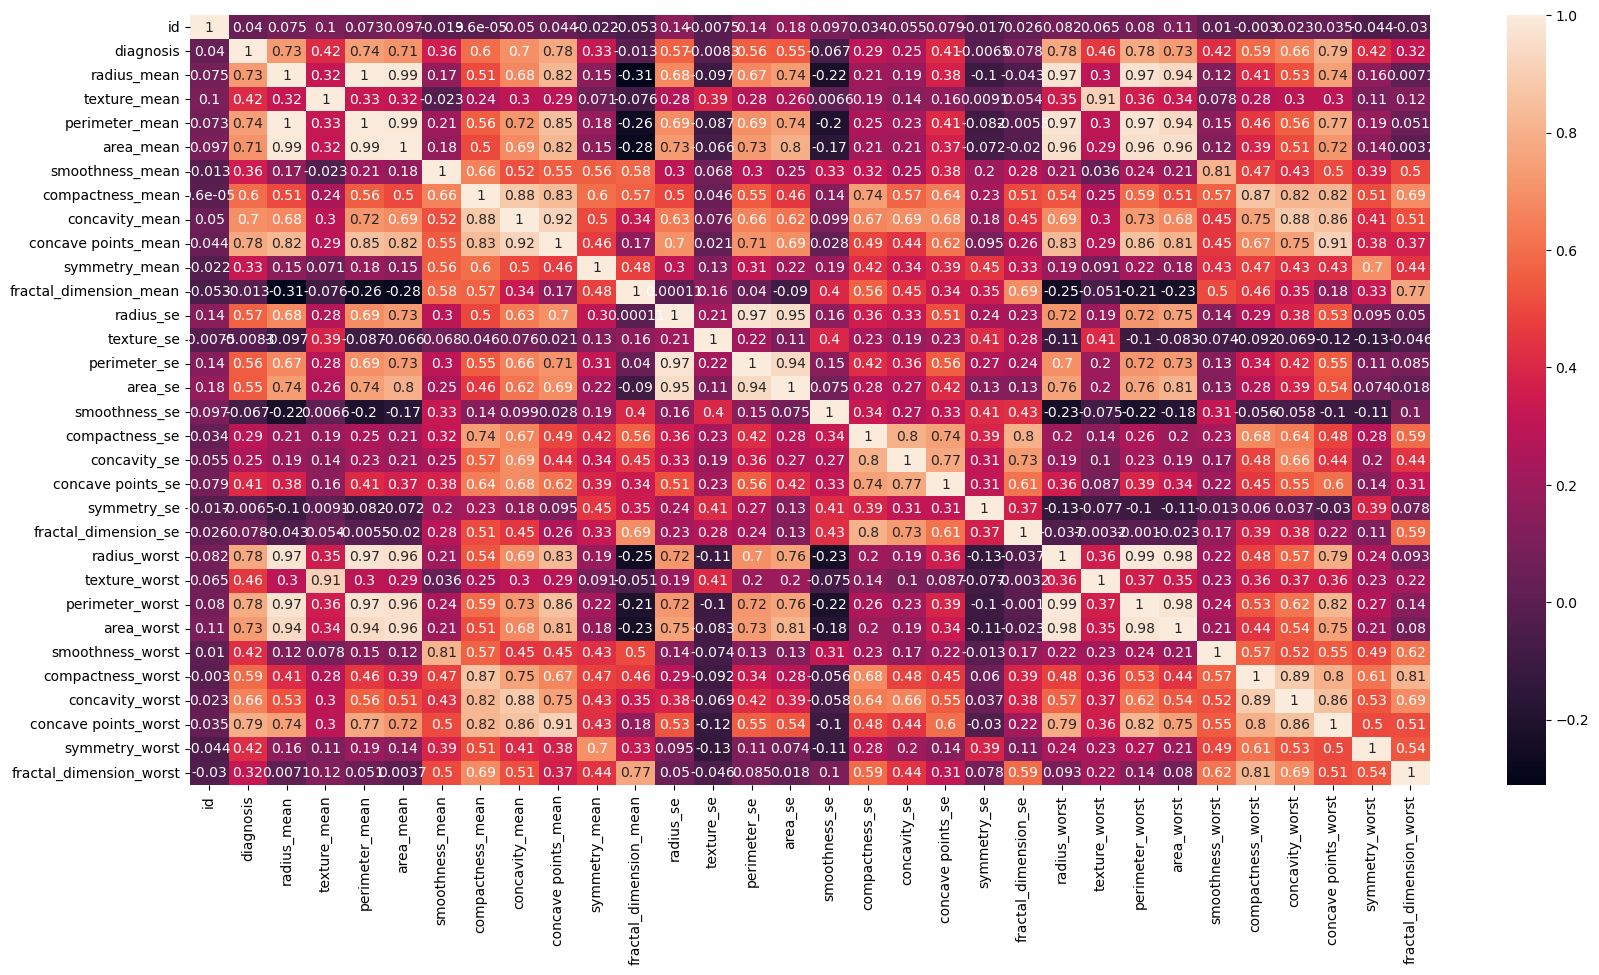

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
for i in df.columns.tolist():
    print("Number of unique value in", i ,"is", df[i].nunique())

Number of unique value in id is 569
Number of unique value in diagnosis is 2
Number of unique value in radius_mean is 456
Number of unique value in texture_mean is 479
Number of unique value in perimeter_mean is 522
Number of unique value in area_mean is 539
Number of unique value in smoothness_mean is 474
Number of unique value in compactness_mean is 537
Number of unique value in concavity_mean is 537
Number of unique value in concave points_mean is 542
Number of unique value in symmetry_mean is 432
Number of unique value in fractal_dimension_mean is 499
Number of unique value in radius_se is 540
Number of unique value in texture_se is 519
Number of unique value in perimeter_se is 533
Number of unique value in area_se is 528
Number of unique value in smoothness_se is 547
Number of unique value in compactness_se is 541
Number of unique value in concavity_se is 533
Number of unique value in concave points_se is 507
Number of unique value in symmetry_se is 498
Number of unique value in f

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
# Getting mean columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [21]:
# Getting se columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

In [22]:
# Getting worst columns with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

diagnosis
0    357
1    212
Name: count, dtype: int64
 


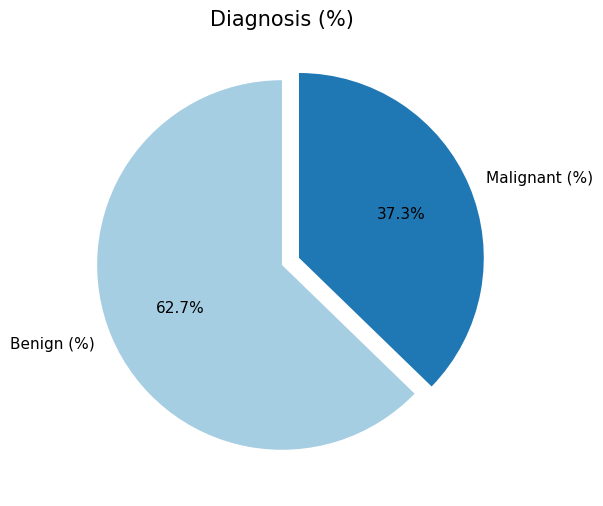

In [23]:
print(df.diagnosis.value_counts())
print(" ")

# Color palette selection
colors = sns.color_palette("Paired")

# Plotting data on chart
plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(df['diagnosis'].value_counts(), labels=['Benign (%)','Malignant (%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Diagnosis (%)', fontsize=15)

# Displaying chart
plt.show()

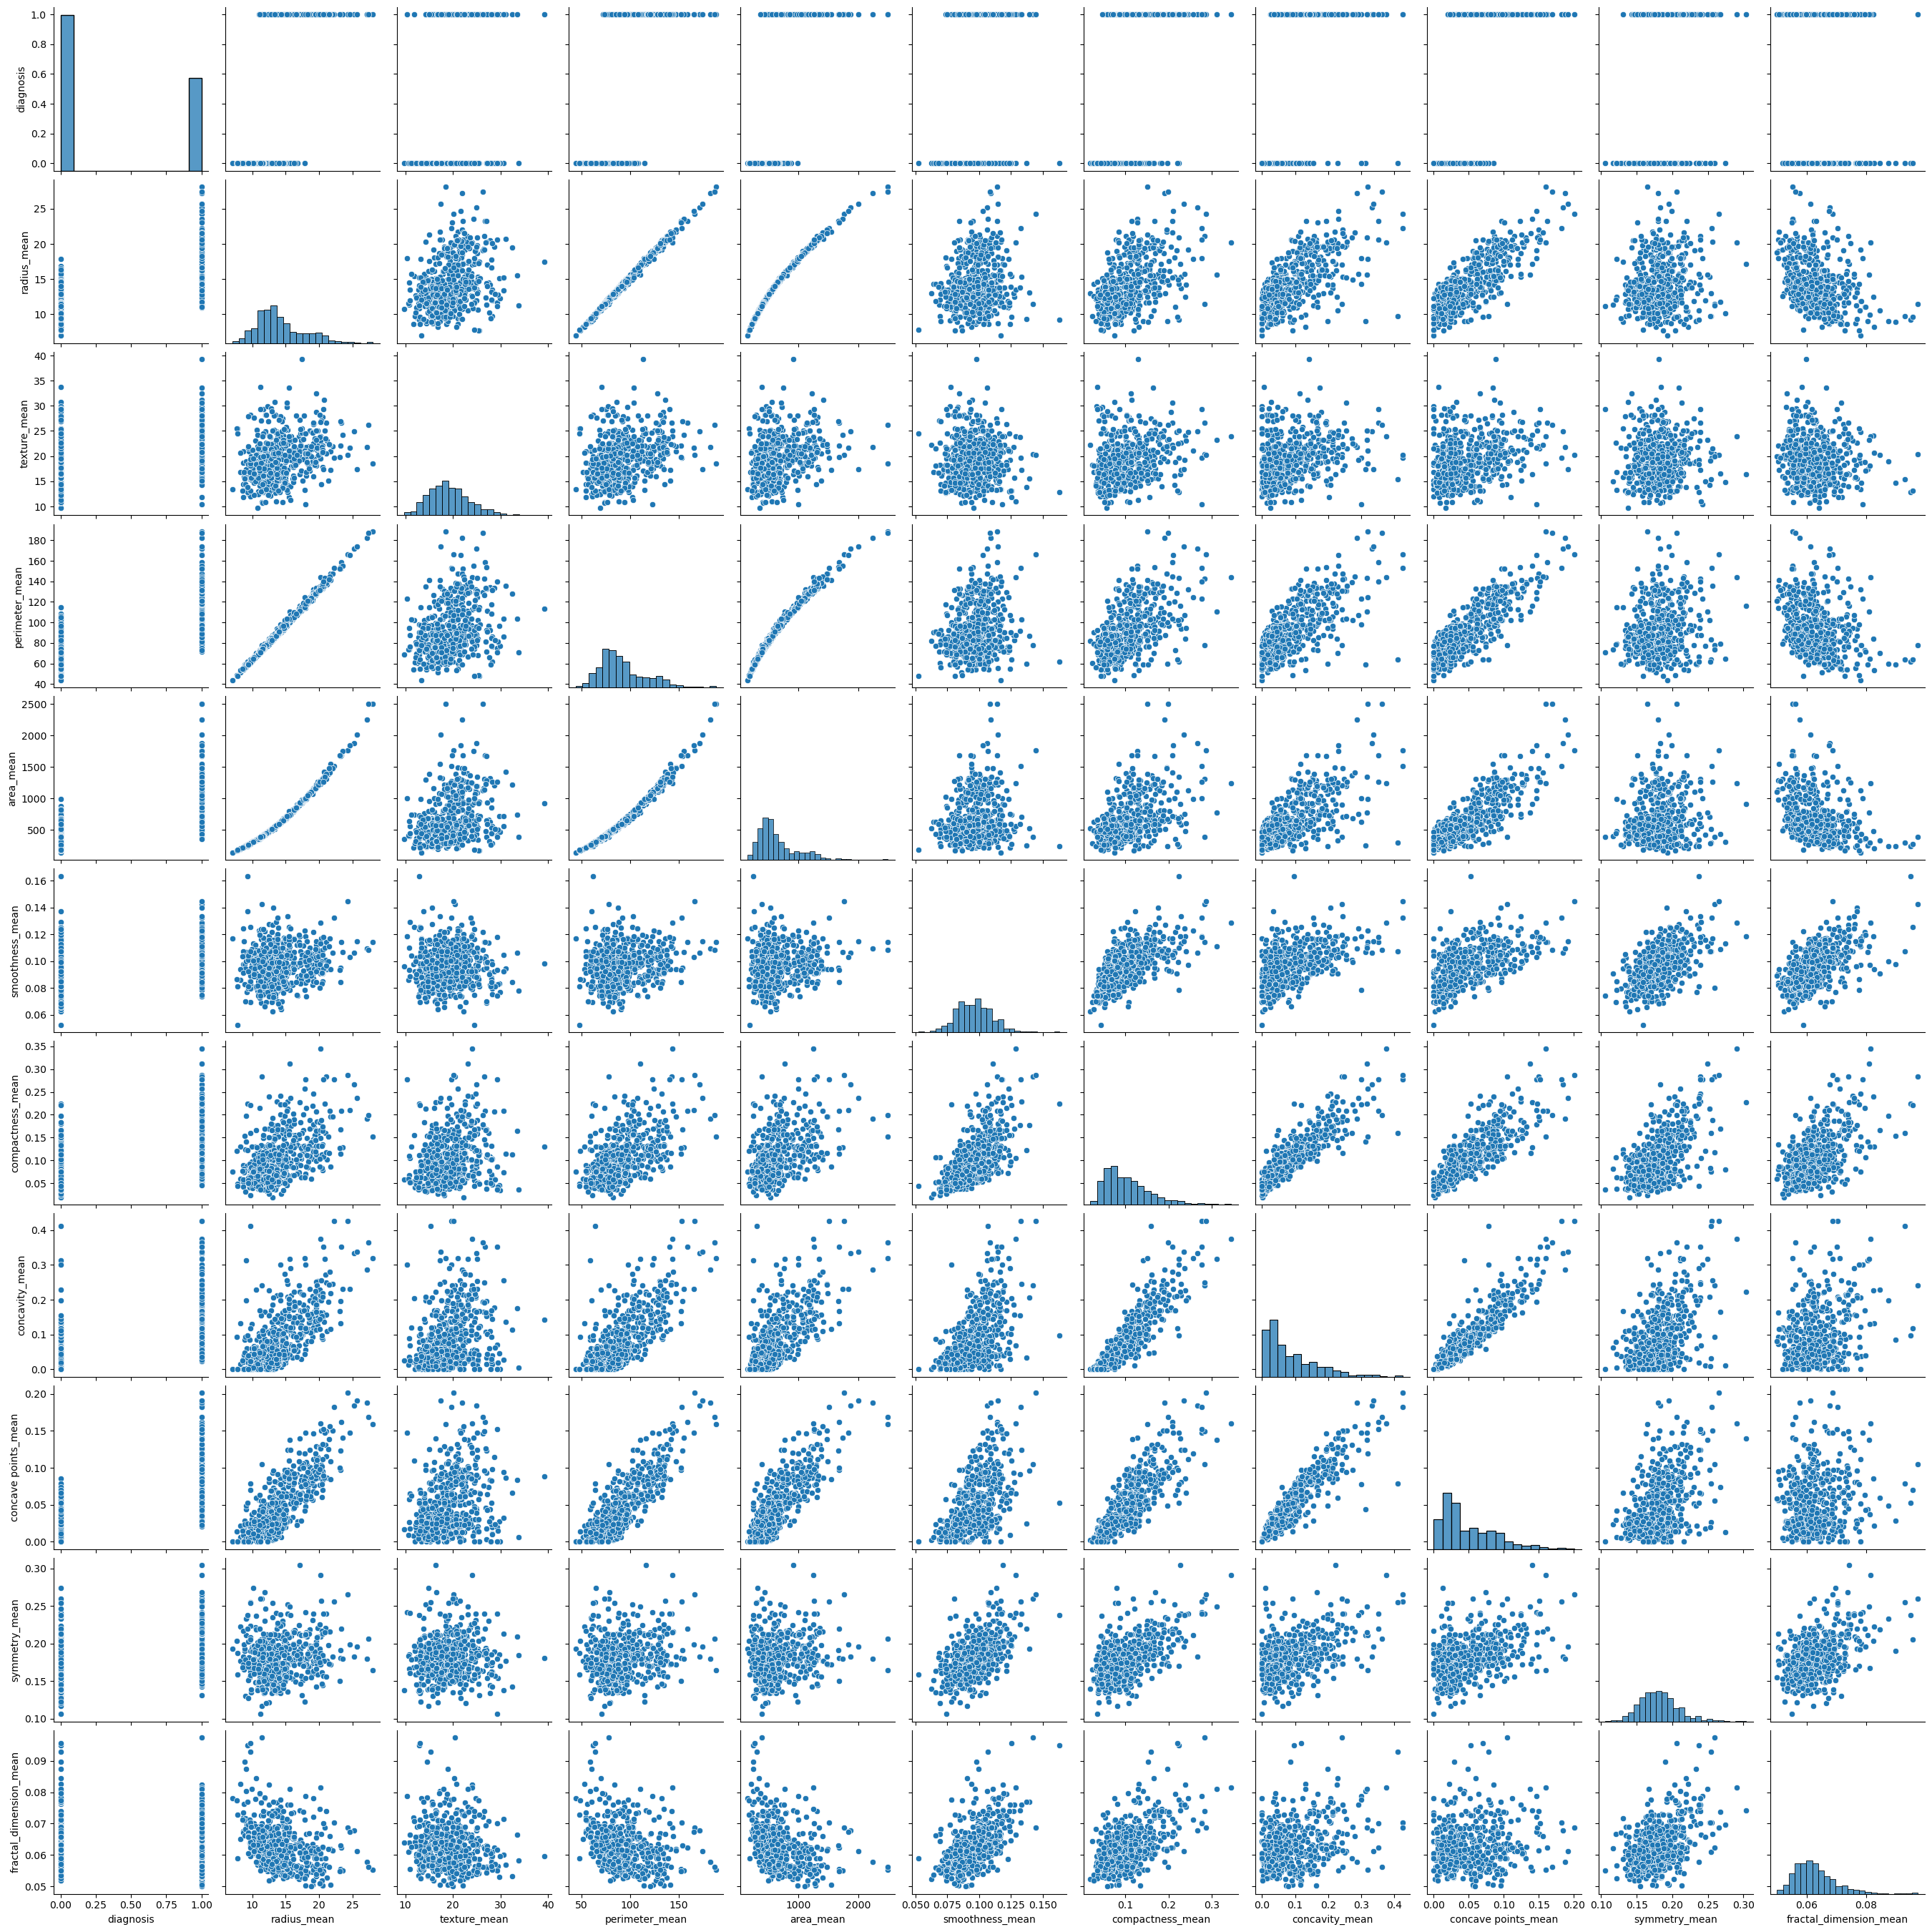

In [24]:
sns.pairplot(df[m_col])

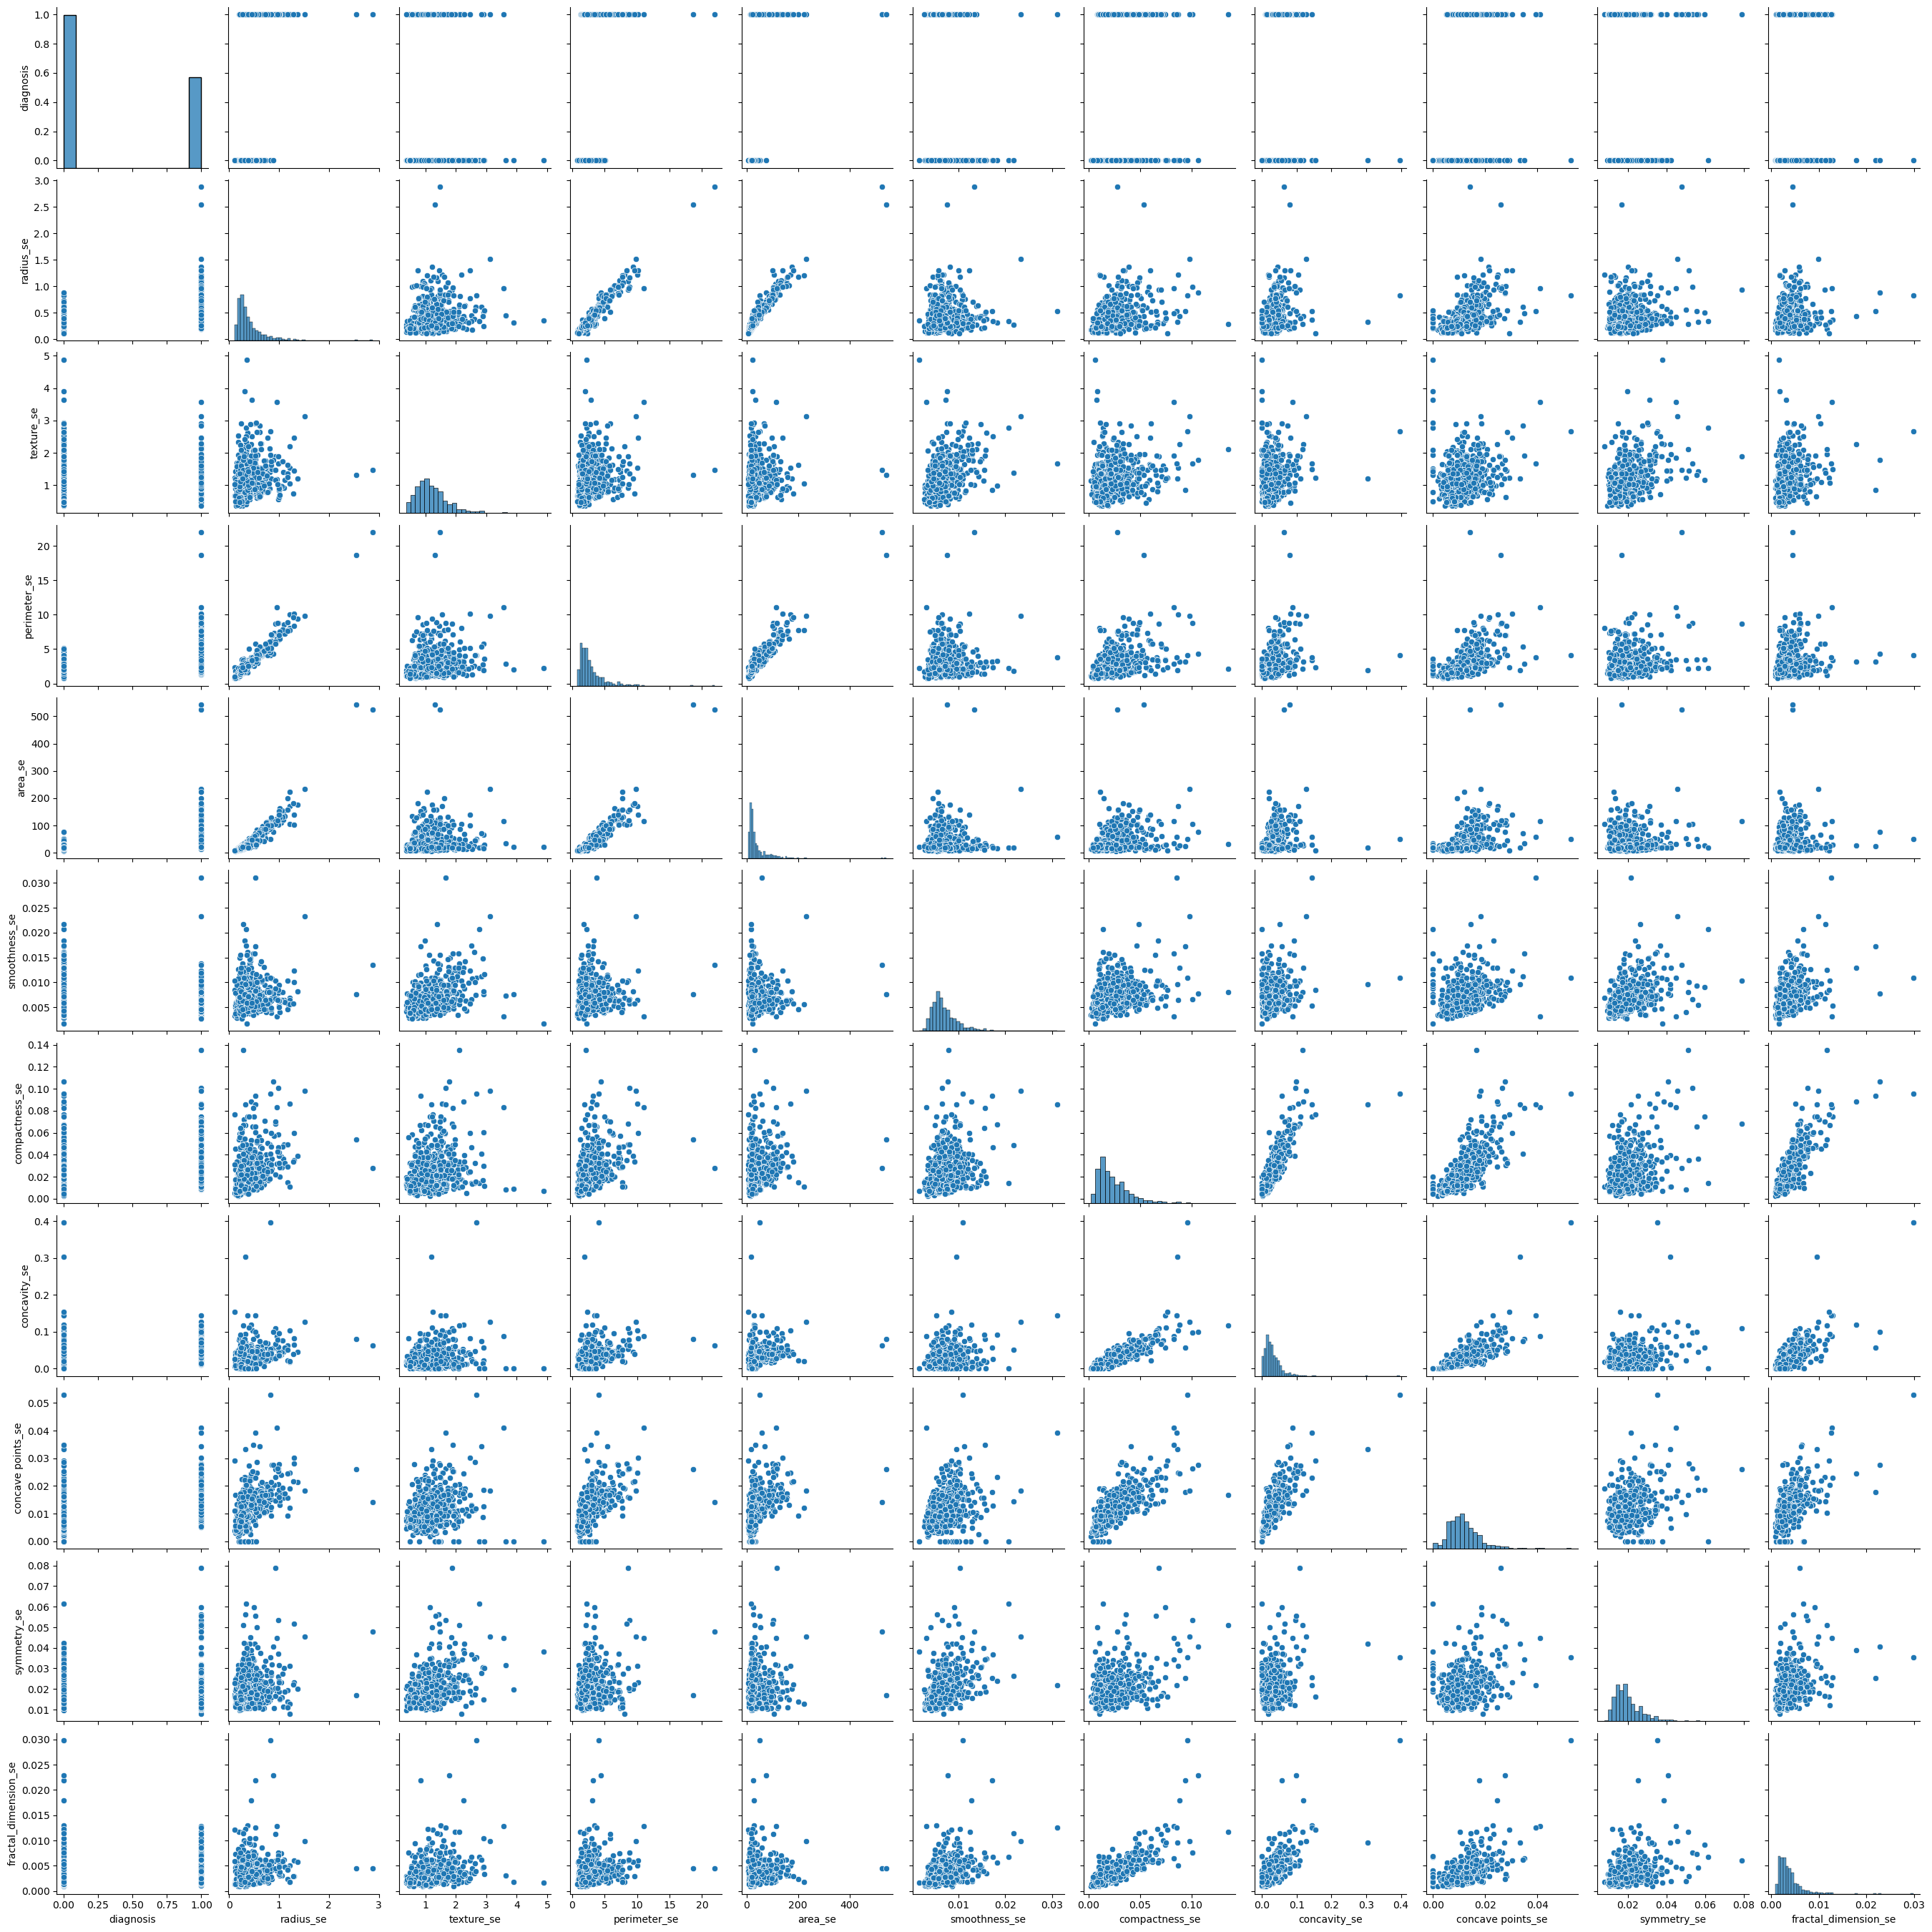

In [25]:
sns.pairplot(df[s_col])

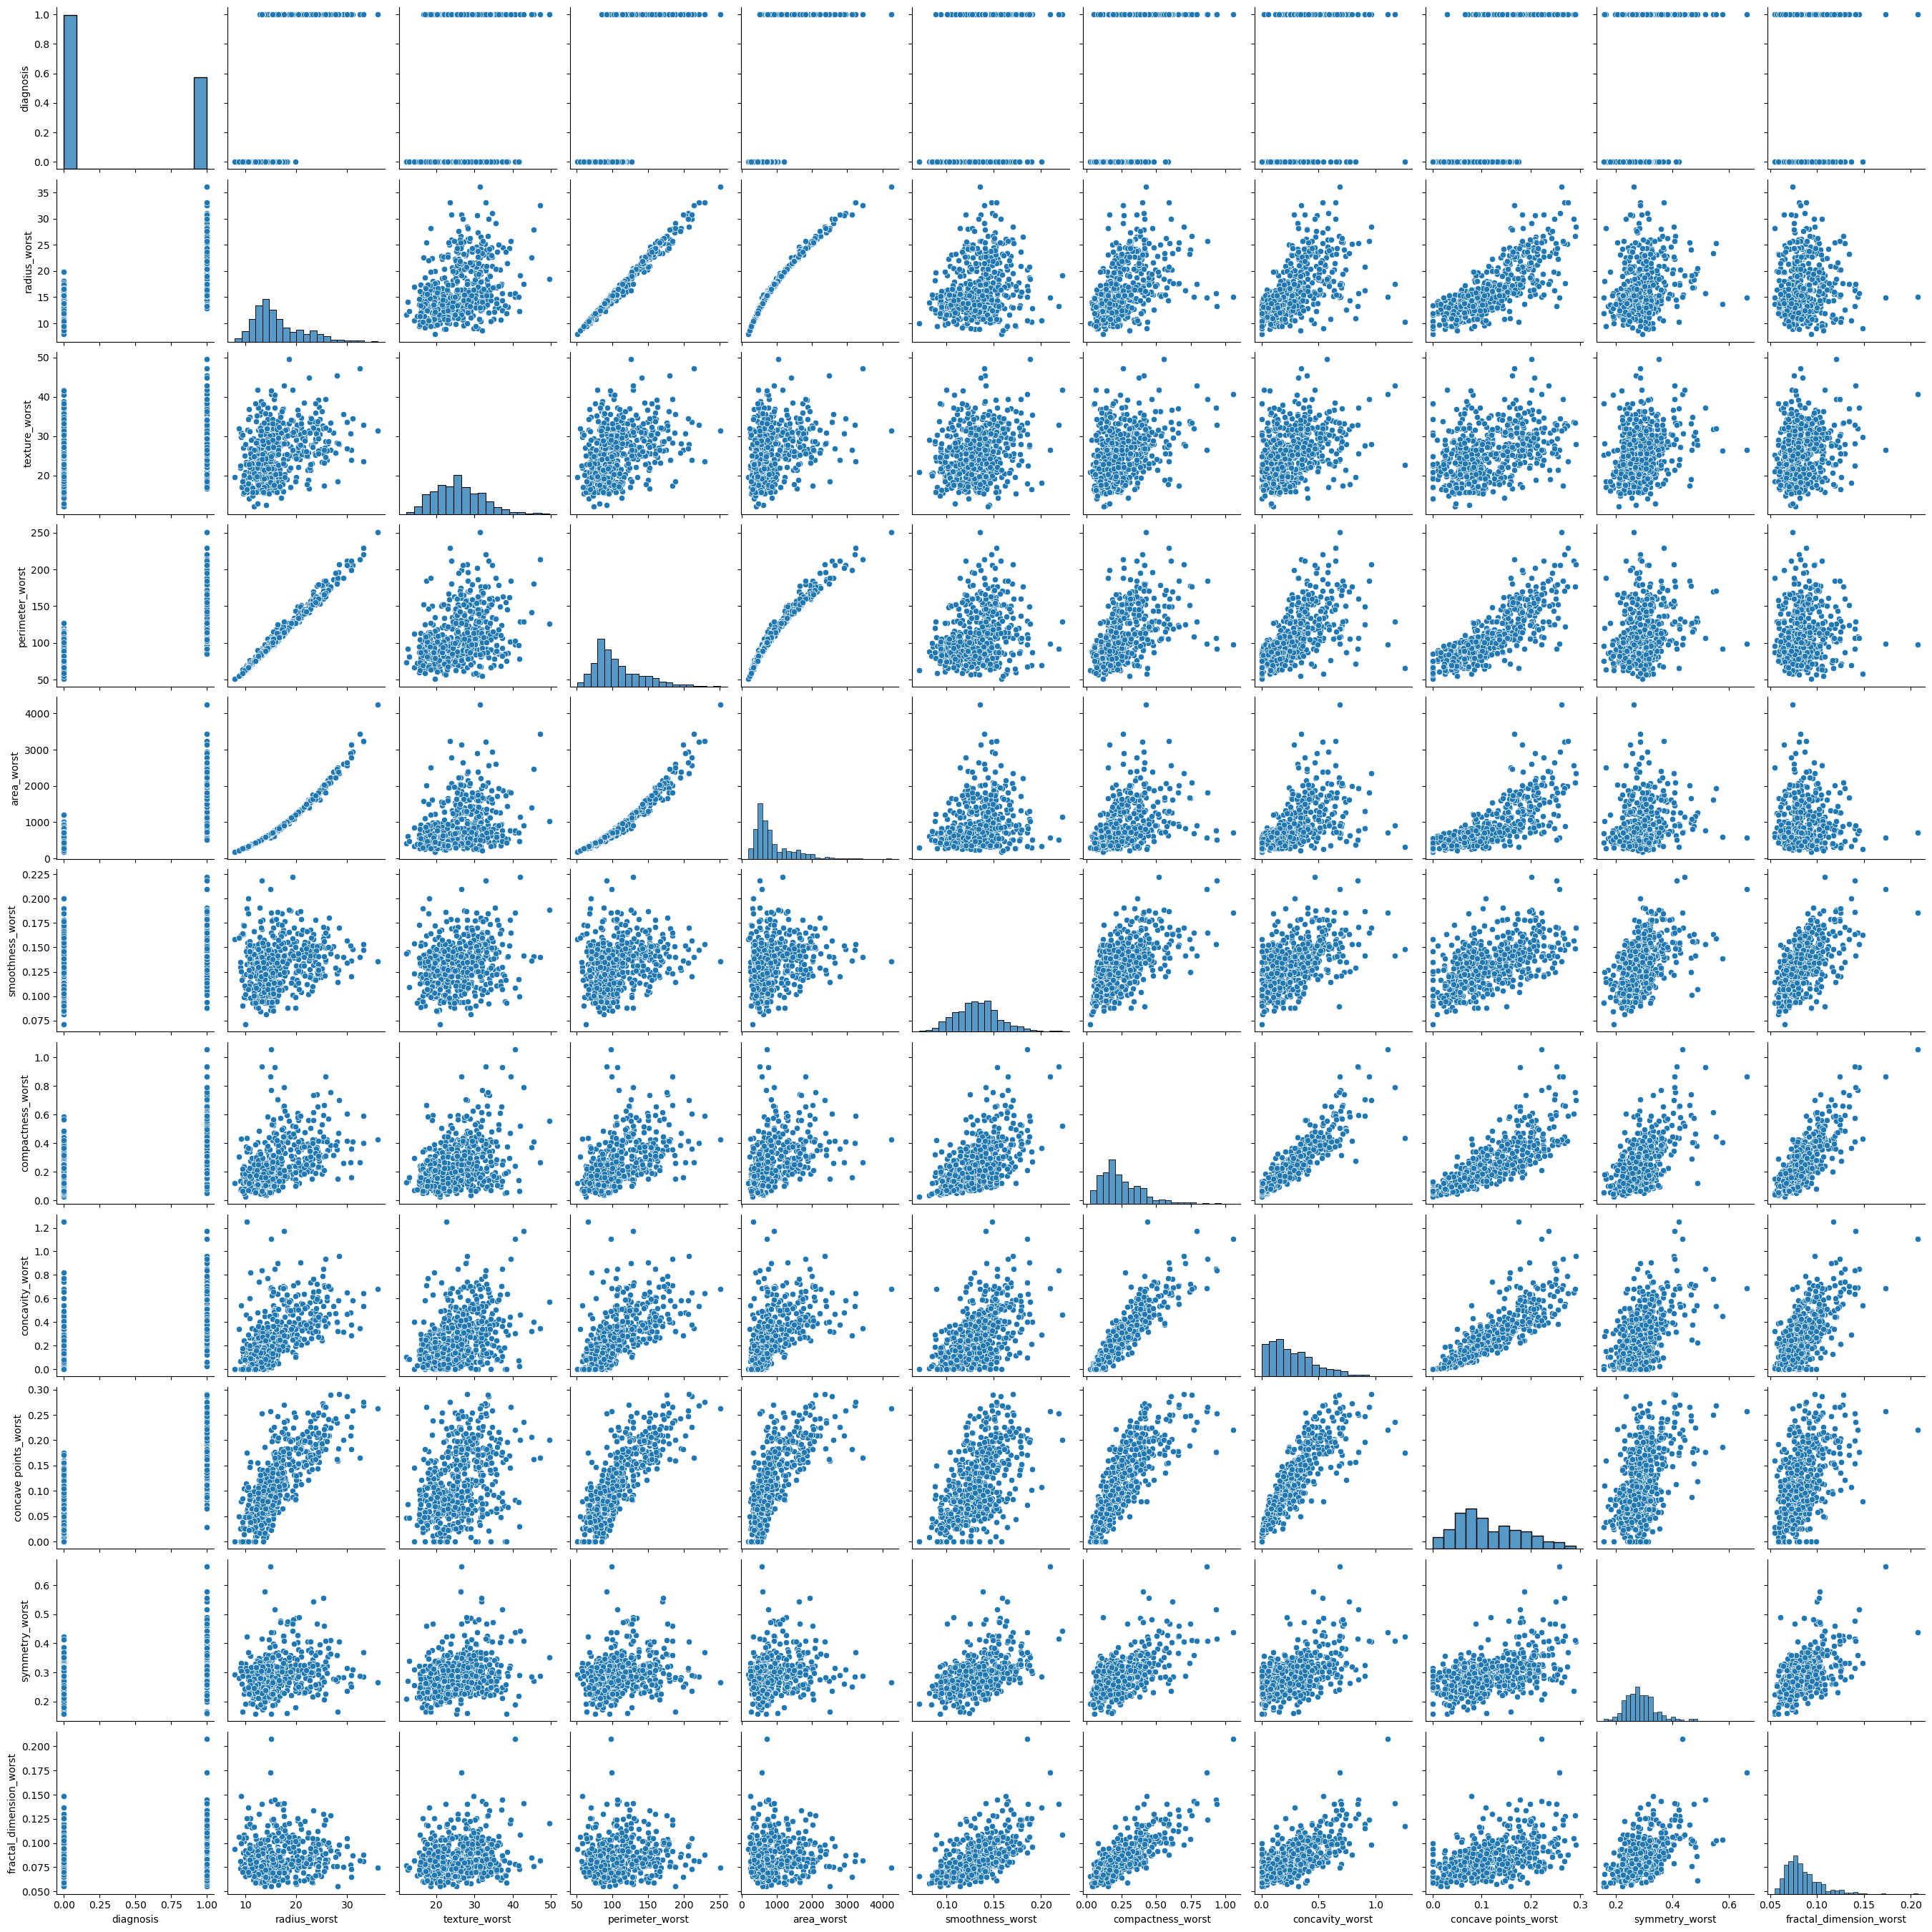

In [26]:
sns.pairplot(df[w_col])

<Axes: xlabel='diagnosis', ylabel='radius_worst'>

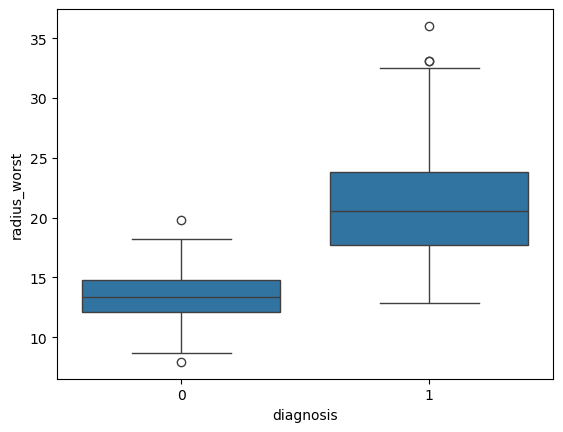

In [27]:
sns.boxplot(x='diagnosis', y='radius_worst', data=df)


In [28]:
X= df.drop(['id', 'diagnosis'], axis=1)

In [29]:
y=df['diagnosis']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
287        12.89         13.12           81.89      515.9          0.06955   
512        13.40         20.52           88.64      556.7          0.11060   
402        12.96         18.29           84.18      525.2          0.07351   
446        17.75         28.03          117.30      981.6          0.09997   
210        20.58         22.14          134.70     1290.0          0.09090   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
287           0.03729         0.02260              0.01171         0.1337   
512           0.14690         0.14450              0.08172         0.2116   
402           0.07899         0.04057              0.01883         0.1874   
446           0.13140         0.16980              0.08293         0.1713   
210           0.13480         0.16400              0.09561         0.1765   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
287                 0.05581  ...         13.62          15.54   
512                 0.07325  ...         16.41          29.66   
402                 0.05899  ...         14.13          24.61   
446                 0.05916  ...         21.53          38.54   
210                 0.05024  ...         23.24          27.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
287            87.40       577.0           0.09616             0.1147   
512           113.30       844.4           0.15740             0.3856   
402            96.31       621.9           0.09329             0.2318   
446           145.40      1437.0           0.14010             0.3762   
210           158.30      1656.0           0.11780             0.2920   

     concavity_worst  concave points_worst  symmetry_worst  \
287           0.1186               0.05366          0.2309   
512           0.5106               0.20510          0.3585   
402           0.1604               0.06608          0.3207   
446           0.6399               0.19700          0.2972   
210           0.3861               0.19200          0.2909   

     fractal_dimension_worst  
287                  0.06915  
512                  0.11090  
402                  0.07247  
446                  0.09075  
210                  0.05865  

[5 rows x 30 columns]

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier()
}


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train_res, y_train_res)
    
    # Predictions
    y_pred_train = model.predict(X_train_res)
    y_pred_test = model.predict(X_test_scaled)
    
    # Training set metrics
    train_accuracy = accuracy_score(y_train_res, y_pred_train)
    train_f1 = f1_score(y_train_res, y_pred_train, average='weighted')
    train_precision = precision_score(y_train_res, y_pred_train, average='weighted')
    train_recall = recall_score(y_train_res, y_pred_train, average='weighted')
    train_roc_auc = roc_auc_score(y_train_res, y_pred_train)
    train_conf_matrix = confusion_matrix(y_train_res, y_pred_train)
    train_class_report = classification_report(y_train_res, y_pred_train)
    
    # Test set metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_roc_auc = roc_auc_score(y_test, y_pred_test)
    test_conf_matrix = confusion_matrix(y_test, y_pred_test)
    test_class_report = classification_report(y_test, y_pred_test)
    
    # Print results
    print(f"Model: {model_name}")
    
    print("\nTraining Set Performance:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"ROC AUC Score: {train_roc_auc:.4f}")
    print("Confusion Matrix:\n", train_conf_matrix)
    print("Classification Report:\n", train_class_report)
    
    print("\nTest Set Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print("Confusion Matrix:\n", test_conf_matrix)
    print("Classification Report:\n", test_class_report)
    
    print("="*50, "\n")



    

Model: LogisticRegression

Training Set Performance:
Accuracy: 0.9832
F1 Score: 0.9832
Precision: 0.9833
Recall: 0.9832
ROC AUC Score: 0.9832
Confusion Matrix:
 [[265   3]
 [  6 262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       268
           1       0.99      0.98      0.98       268

    accuracy                           0.98       536
   macro avg       0.98      0.98      0.98       536
weighted avg       0.98      0.98      0.98       536


Test Set Performance:
Accuracy: 0.9790
F1 Score: 0.9791
Precision: 0.9792
Recall: 0.9790
ROC AUC Score: 0.9795
Confusion Matrix:
 [[87  2]
 [ 1 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       

In [42]:
param_rf = {
    'n_estimators': [100, 200, 500],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt']    # Number of features to consider
    
}
param_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}
param_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'solver': ['lbfgs', 'saga'],           # Solver
    'max_iter': [100, 200, 500],
    'l1_ratio': [0, 0.5, 1]                # Only used for 'elasticnet'
}


In [ ]:
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        max_depth=10,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        reg_lambda=1.5,
        reg_alpha=0,
        n_estimators=500,
        max_depth=7,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=1,
        eval_metric="logloss",
        random_state=42
    ),

    "Logistic Regression": LogisticRegression(
        solver='lbfgs',
        penalty='l2',
        C=10,
        max_iter=500
    )
}

for model_name, model in models.items():

    model.fit(X_train_res, y_train_res)

    # Predictions
    y_pred_train = model.predict(X_train_res)
    y_pred_test = model.predict(X_test_scaled)

    # Probabilities for ROC-AUC
    y_prob_train = model.predict_proba(X_train_res)[:, 1]
    y_prob_test = model.predict_proba(X_test_scaled)[:, 1]

    # Training metrics
    train_accuracy = accuracy_score(y_train_res, y_pred_train)
    train_f1 = f1_score(y_train_res, y_pred_train, average='weighted')
    train_precision = precision_score(y_train_res, y_pred_train, average='weighted')
    train_recall = recall_score(y_train_res, y_pred_train, average='weighted')
    train_roc_auc = roc_auc_score(y_train_res, y_prob_train)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_roc_auc = roc_auc_score(y_test, y_prob_test)

    print(f"\nModel: {model_name}")

    print("\nTraining Set Performance:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"ROC AUC Score: {train_roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train))
    print("Classification Report:\n", classification_report(y_train_res, y_pred_train))

    print("\nTest Set Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    print("=" * 60)


In [43]:
randomcv_models = [
    ("RandomForestClassifier", RandomForestClassifier(),param_rf),

    ("XGBClassifier",XGBClassifier(),param_xgb),
    ("LogisticRegression",LogisticRegression(),param_lr)
                   
                   ]
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2)
    random.fit(X_train_res, y_train_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estima

E:\anocanda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anocanda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anocanda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "E:\anocanda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
    ~~~~~~~~~

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=1.5, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, g

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\a

[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] 

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=1, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=1, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=1, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=e

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=0, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01,

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200,

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty

[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=200, penalty=l

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=0.01, l1_ratio=0, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only use

[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=none, solver=saga; to

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=1, l1_ratio=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, 

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only use

[CV] END C=1, l1_ratio=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=elasticne

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

[CV] END C=100, l1_ratio=0, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=200, penalty=elasticnet, solver=lbfgs; tot

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=0.01, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=100, pena

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_r

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=2

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the co

[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty

[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only use

[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not co

[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time= 

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the co

[CV] END C=10, l1_ratio=0.5, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s


E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, pena

E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\anocanda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0

In [51]:
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        max_depth=10,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        reg_lambda=1.5,
        reg_alpha=0,
        n_estimators=500,
        max_depth=7,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=1,
        eval_metric="logloss",
        random_state=42
    ),

    "Logistic Regression": LogisticRegression(
        solver='lbfgs',
        penalty='l2',
        C=10,
        max_iter=500
    )
}

for model_name, model in models.items():

    model.fit(X_train_res, y_train_res)

    # Predictions
    y_pred_train = model.predict(X_train_res)
    y_pred_test = model.predict(X_test_scaled)

    # Probabilities for ROC-AUC
    y_prob_train = model.predict_proba(X_train_res)[:, 1]
    y_prob_test = model.predict_proba(X_test_scaled)[:, 1]

    # Training metrics
    train_accuracy = accuracy_score(y_train_res, y_pred_train)
    train_f1 = f1_score(y_train_res, y_pred_train, average='weighted')
    train_precision = precision_score(y_train_res, y_pred_train, average='weighted')
    train_recall = recall_score(y_train_res, y_pred_train, average='weighted')
    train_roc_auc = roc_auc_score(y_train_res, y_prob_train)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_roc_auc = roc_auc_score(y_test, y_prob_test)

    print(f"\nModel: {model_name}")

    print("\nTraining Set Performance:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"ROC AUC Score: {train_roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_pred_train))
    print("Classification Report:\n", classification_report(y_train_res, y_pred_train))

    print("\nTest Set Performance:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))

    print("=" * 60)



Model: Random Forest

Training Set Performance:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
Confusion Matrix:
 [[268   0]
 [  0 268]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       268

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536


Test Set Performance:
Accuracy: 0.9860
F1 Score: 0.9860
Precision: 0.9860
Recall: 0.9860
ROC AUC Score: 0.9988
Confusion Matrix:
 [[88  1]
 [ 1 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99

<Figure size 640x480 with 0 Axes>

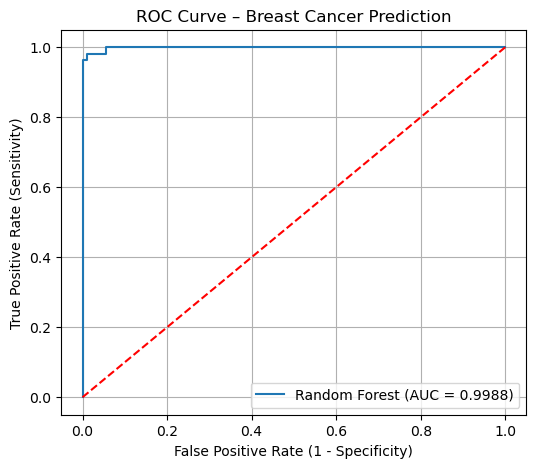

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train_res, y_train_res)
# Predictions
y_pred_train_rf = rf_model.predict(X_train_res)
y_pred_test_rf  = rf_model.predict(X_test_scaled)

# Probabilities (VERY IMPORTANT)
y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve – Breast Cancer Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [58]:
# Train
y_train_confusion_matrix = confusion_matrix(y_train_res, y_pred_train_rf)
# Test
y_test_confusion_matrix  = confusion_matrix(y_test, y_pred_test_rf)



Confusion Matrix:


Text(0.5, 1.0, 'Test Confusion Matrix')

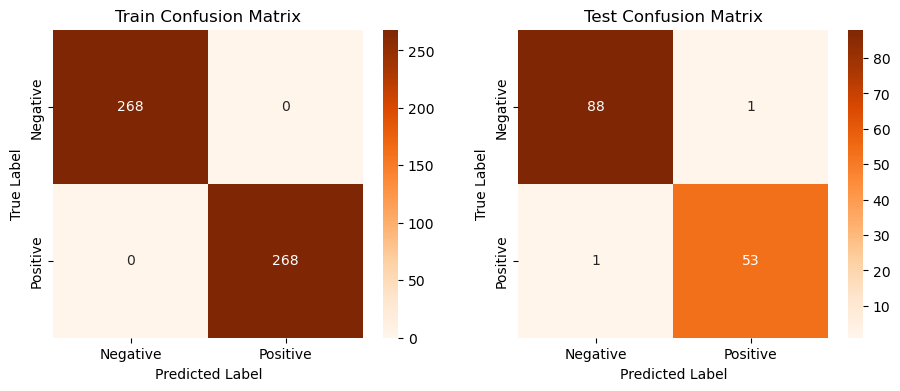

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))

print("\nConfusion Matrix:")
sns.heatmap(y_train_confusion_matrix, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(y_test_confusion_matrix, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")